# Pymaceuticals Inc.

# Analysis

The regimens Capomulin and Ramicane had the lowest mean tumor volumes in the study and the least variability indicated by variance and standard deviation measurements.

Of the four regimens that were plotted, Infubinol was the only one that contained an outlier.

Gender was fairly equally represented between male and female mice.

Although tumor volume varied at the same mouse weight, there was a strong positive correlation between mouse weight and average tumor volume in the Capomulin regimen. Mice who weighed more had larger tumors.

The tumor volume decreased over time for mice treated with the Capomulin regimen.



In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
study_results
# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results,
                           how='left', on='Mouse ID')
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids_complete = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mouse_ids_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data_complete = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [83]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

# Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": var_tumor_volume, "Tumor Volume Std. Dev.": std_tumor_volume, "Tumor Volume Std. Err.": sem_tumor_volume})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

print(clean_study_data_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}).reset_index())

  Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398


# Bar and Pie Charts

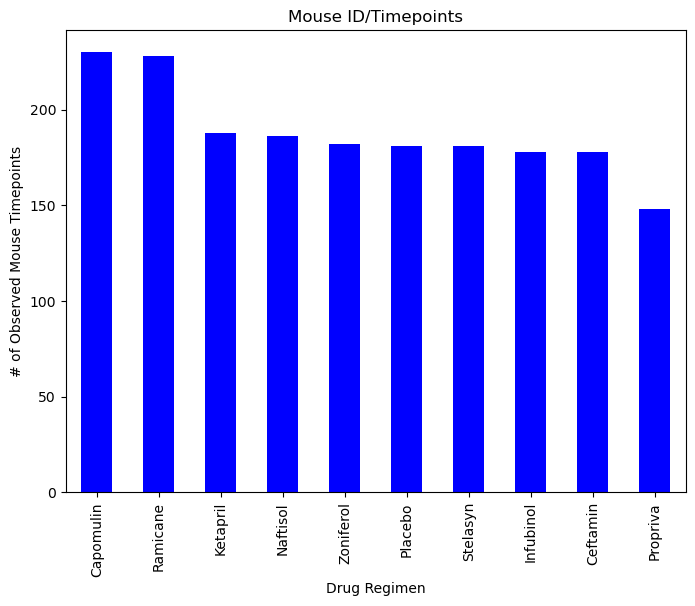

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_rows = clean_study_data_complete["Drug Regimen"].value_counts()
figure1 = total_rows.plot(kind="bar", facecolor="blue", figsize=(8,6),
                         title="Mouse ID/Timepoints",
                         xlabel="Drug Regimen",
                         ylabel="# of Observed Mouse Timepoints")



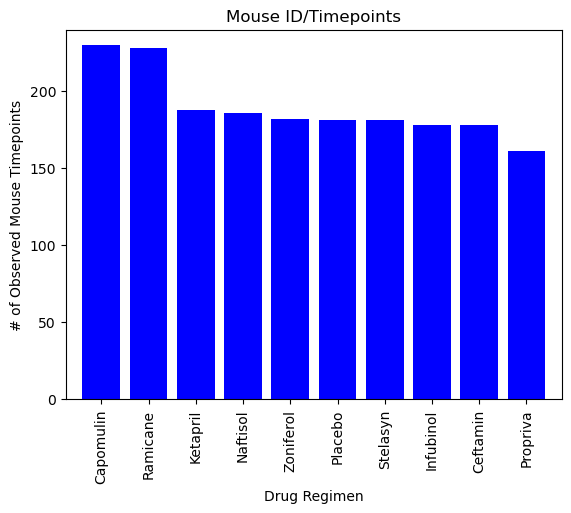

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
clean_study_data_complete["Drug Regimen"].value_counts()
drug_regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]
count_of_timepoints = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(count_of_timepoints))

tick_locations = [value for value in x_axis]

plt.bar(x_axis, count_of_timepoints, color="b", align="center")
plt.xticks(tick_locations, drug_regimens, rotation=90)


plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(count_of_timepoints)+10)

plt.title("Mouse ID/Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

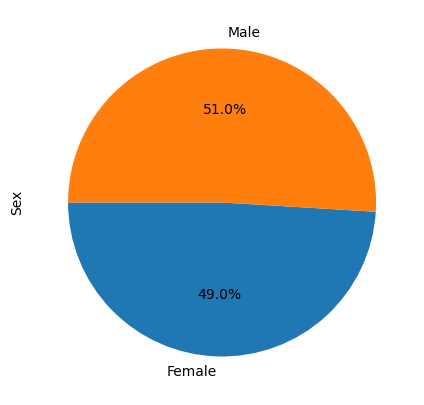

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_study_data_complete.groupby(['Sex'])['Sex'].count()
gender.plot.pie(startangle=180, figsize=(5,5),autopct ='%1.1f%%')
ylabel='Sex'


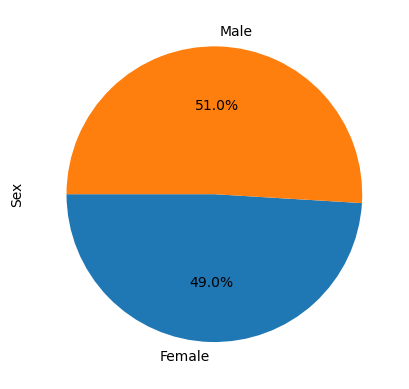

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
         

gender = clean_study_data_complete.groupby(['Sex'])['Sex'].count()
plt.pie(gender, labels=('Female', 'Male'),startangle=180, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_study_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(clean_study_data_complete, greatest_timepoint_df, on = ("Mouse ID", "Timepoint"), how = "right")
tumor_volume_df

regimens_df = tumor_volume_df[tumor_volume_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,Female,6,27,45,68.594745,4
239,y793,Capomulin,Male,17,17,45,31.896238,2
240,y865,Ceftamin,Male,23,26,45,64.729837,3
244,z578,Ramicane,Male,11,16,45,30.638696,0


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_reg = []
rami_reg = []
infu_reg = []
ceft_reg = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

for index, row in tumor_volume_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        capo_reg.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[1]:
        rami_reg.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[2]:
        infu_reg.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[3]:
        ceft_reg.append(row["Tumor Volume (mm3)"])

# add subset

treatment_reg = pd.DataFrame({"Capomulin": capo_reg, treatments[1]: rami_reg,
                             treatments[2]: infu_reg, treatments[3]: ceft_reg})
treatment_reg_min = treatment_reg.min()
treatment_reg.max = treatment_reg.max()

# Determine outliers using upper and lower bounds
    
# Capomulin
capo_quartiles = treatment_reg[treatments[0]].quantile([0.25, 0.5, 0.75]) 
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
capo_max = treatment_reg[treatments[0]].max()
capo_medq = capo_quartiles[0.5]
capo_min = treatment_reg[treatments[0]].min()

print(f"Capomulin's potential outliers: {capo_lower_bound}, {capo_upper_bound}")
print(f"----------------------------------------------")

# Ramicane

rami_quartiles = treatment_reg[treatments[1]].quantile([0.25, 0.5, 0.75]) 
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
rami_max = treatment_reg[treatments[1]].max()
rami_medq = rami_quartiles[0.5]
rami_min = treatment_reg[treatments[1]].min()

print(f"Ramicane's potential outliers: {rami_lower_bound}, {rami_upper_bound}")
print(f"----------------------------------------------")

# Infubinol

infu_quartiles = treatment_reg[treatments[2]].quantile([0.25, 0.5, 0.75]) 
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
infu_max = treatment_reg[treatments[2]].max()
infu_medq = infu_quartiles[0.5]
infu_min = treatment_reg[treatments[2]].min()

print(f"Infubinol's potential outliers: {infu_lower_bound}, {infu_upper_bound}")
print(f"----------------------------------------------")

#Ceftamin

ceft_quartiles = treatment_reg[treatments[3]].quantile([0.25, 0.5, 0.75]) 
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
ceft_max = treatment_reg[treatments[3]].max()
ceft_medq = ceft_quartiles[0.5]
ceft_min = treatment_reg[treatments[3]].min()

print(f"Ceftamin's potential outliers: {ceft_lower_bound}, {ceft_upper_bound}")
print(f"----------------------------------------------")


Capomulin's potential outliers: 20.70456164999999, 51.83201549
----------------------------------------------
Ramicane's potential outliers: 17.912664470000003, 54.30681135
----------------------------------------------
Infubinol's potential outliers: 36.83290494999999, 82.74144559000001
----------------------------------------------
Ceftamin's potential outliers: 25.355449580000002, 87.66645829999999
----------------------------------------------


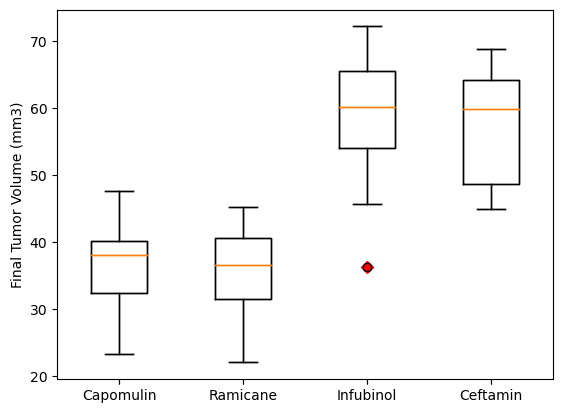

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_treatments = [treatment_reg[treatments[0]], treatment_reg[treatments[1]], \
                        treatment_reg[treatments[2]], treatment_reg[treatments[3]]]

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(boxplot_treatments, 0, "rD")
plt.xticks([1,2,3,4], treatments)
ax1.boxplot(boxplot_treatments, labels = treatments)
plt.show()


# Line and Scatter Plots

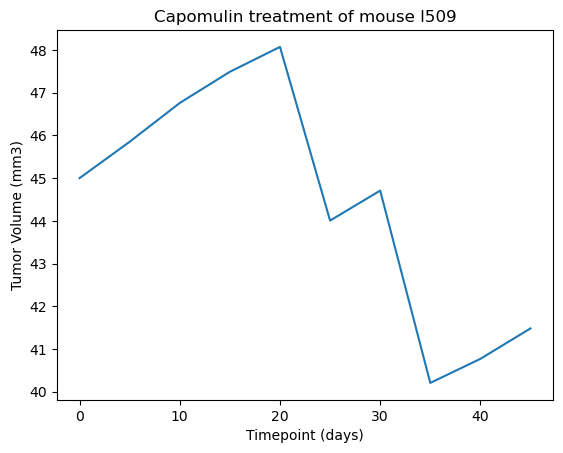

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = clean_study_data_complete.loc[clean_study_data_complete["Mouse ID"] == "l509",:]
line_plot
x_axis = line_plot["Timepoint"]
tumor_volume = line_plot["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_volume, linewidth = 1.5, markersize = 8)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

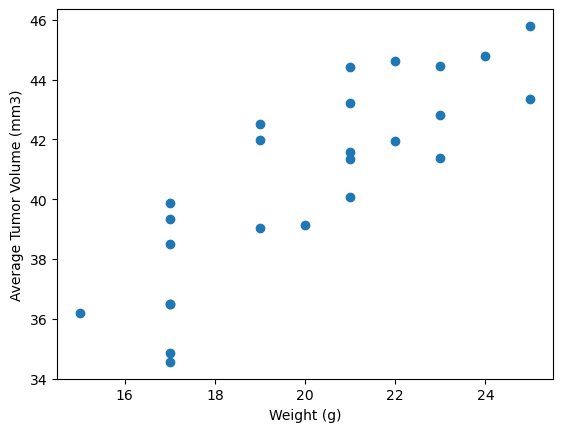

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_result = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin",:]
capo_result
capo_average = capo_result.groupby(["Mouse ID"]).mean(numeric_only=True)
capo_average
plt.scatter(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


# Correlation and Regression

In [95]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capo_average["Weight (g)"],capo_average["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between both factors is {correlation}")


The correlation between both factors is 0.84


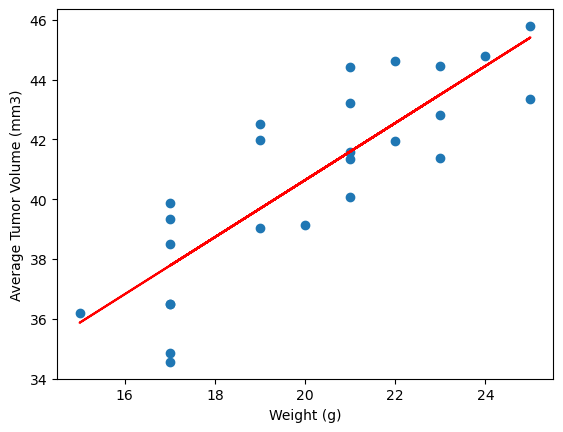

In [96]:
x_values = capo_average["Weight (g)"]
y_values = capo_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()